In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Loading Data

In [2]:
baby_meta_df= pd.read_csv('baby_meta.csv', dtype={'salesRank': dict}) 

In [3]:
baby_rating_df= pd.read_csv('ratings_Baby.csv', names = ['reviewerID', 'asin', 'overall', 'unixReviewTime']) 

## Product Ratings

In [4]:
def create_product_rating_count_df(rating_x_meta_df):
    return pd.DataFrame(rating_x_meta_df.groupby('asin').overall.count())\
            .rename(index=str, columns={"overall": "rating_count"})
    

In [5]:
def create_product_avg_rating_df(rating_x_meta_df):
    return pd.DataFrame(rating_x_meta_df.groupby('asin').overall.mean())\
            .rename(index=str, columns={"overall": "avg_rating"})

In [6]:
def create_product_rating_summary_df(rating_df, meta_df):
    rating_x_meta_df = rating_df.join(meta_df.set_index('asin'), on='asin')
    count_df = create_product_rating_count_df(rating_x_meta_df)
    avg_df = create_product_avg_rating_df(rating_x_meta_df)
    return meta_df[['asin']].join(count_df, on='asin').join(avg_df, on='asin')

In [7]:
baby_product_rating_summary_df=create_product_rating_summary_df(baby_rating_df, baby_meta_df)

In [8]:
baby_product_rating_summary_df.to_csv('baby_product_rating_summary.csv')

In [9]:
baby_product_rating_summary_df[['asin','rating_count']].to_csv('baby_rating_count.csv')

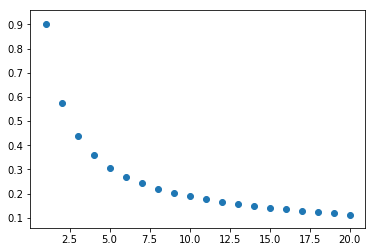

In [10]:
total = baby_product_rating_summary_df.shape[0]
prop_left_ls = []
for n in range(1,21):
    prop_left= baby_product_rating_summary_df.loc[baby_product_rating_summary_df['rating_count']>=n].shape[0]/total
    prop_left_ls.append(prop_left)

import matplotlib.pyplot as plt
%matplotlib inline

xs = range(1,21)
ys = prop_left_ls
plt.scatter(xs,ys)
plt.show()